In [1]:
pip install deeplake

Note: you may need to restart the kernel to use updated packages.Collecting deeplake
     ---------------------------------------- 0.0/643.4 kB ? eta -:--:--
     ---------------------------------------- 0.0/643.4 kB ? eta -:--:--
     ---------------------------------------- 0.0/643.4 kB ? eta -:--:--
     ---------------------------------------- 0.0/643.4 kB ? eta -:--:--
     ---------------------------------------- 0.0/643.4 kB ? eta -:--:--
     ---------------------------------------- 0.0/643.4 kB ? eta -:--:--
     ---------------------------------------- 0.0/643.4 kB ? eta -:--:--
     ---------------------------------------- 0.0/643.4 kB ? eta -:--:--
     ---------------------------------------- 0.0/643.4 kB ? eta -:--:--
     ---------------------------------------- 0.0/643.4 kB ? eta -:--:--
     ---------------------------------------- 0.0/643.4 kB ? eta -:--:--
     ---------------------------------------- 0.0/643.4 kB ? eta -:--:--
     ----------------------------------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
aiobotocore 2.19.0 requires botocore<1.36.4,>=1.36.0, but you have botocore 1.42.7 which is incompatible.


In [5]:
import deeplake

ds_train=deeplake.load("hub://activeloop/animal10n-train")
ds_test=deeplake.load("hub://activeloop/animal10n-test")
print(ds_train.visualize())

|

Opening dataset in read-only mode as you don't have write permissions.


-

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/animal10n-train



\

hub://activeloop/animal10n-train loaded successfully.



-

Opening dataset in read-only mode as you don't have write permissions.


-

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/animal10n-test



/

hub://activeloop/animal10n-test loaded successfully.



HINT: Please forward the port - 59739 to your local machine, if you are running on the cloud.


None
 * Serving Flask app 'dataset_visualizer'
 * Debug mode: off


In [6]:
print(ds_train.shape())

AttributeError: '<class 'deeplake.core.dataset.deeplake_cloud_dataset.DeepLakeCloudDataset'>' object has no attribute 'shape'

In [7]:
#Rectifing the Error of shape

print(ds_train.images.shape)

(50000, 64, 64, 3)


In [9]:
print(ds_test.images.shape)

(5000, 64, 64, 3)


In [12]:
unique_shapes = set()
image_count = 0

# Iterate through the dataset to check shapes
for sample in ds_train:
    # Call .numpy() to load the actual image data into memory as a NumPy array
    image = sample['images'].numpy()
    unique_shapes.add(image.shape)
    image_count += 1

print(f"\nTotal images processed: {image_count}")
print(f"Found {len(unique_shapes)} unique image shapes:")


Total images processed: 50000
Found 1 unique image shapes:


In [13]:
# Print all unique shapes found
for shape in unique_shapes:
    print(f"- {shape}")

# Summary
if len(unique_shapes) == 1:
    print("\nResult: All images in the dataset have the same shape.")
else:
    print("\nResult: Images in the dataset have varying shapes so reshape the images into proper shape.")

- (64, 64, 3)

Result: All images in the dataset have the same shape.


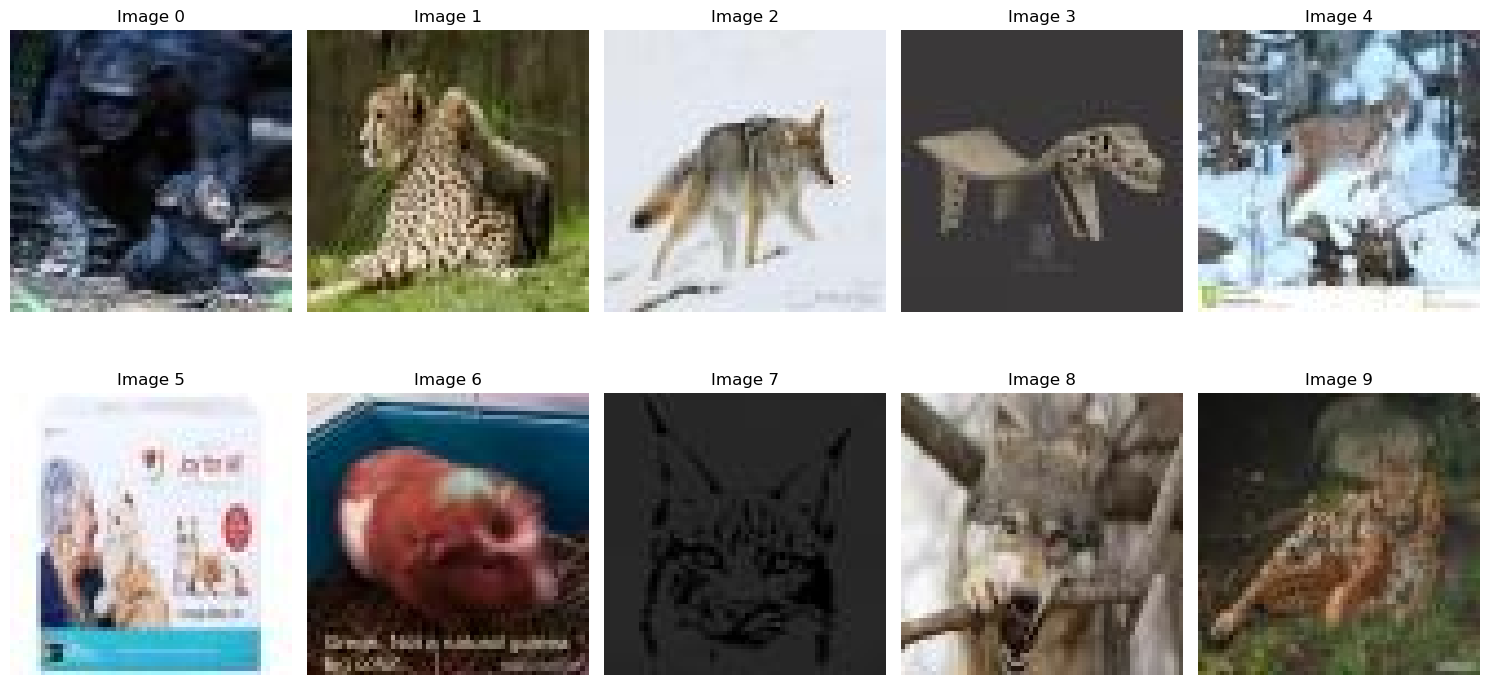

In [18]:
import matplotlib.pyplot as plt

# Show first 10 images
plt.figure(figsize=(15, 8))

for i in range(10):
    sample = ds_train[i]
    img = sample['images']
    
    plt.subplot(2, 5, i+1)   # 2 rows, 5 columns
    plt.imshow(img)
    plt.title(f"Image {i}")
    plt.axis("off")

plt.tight_layout()
plt.show()


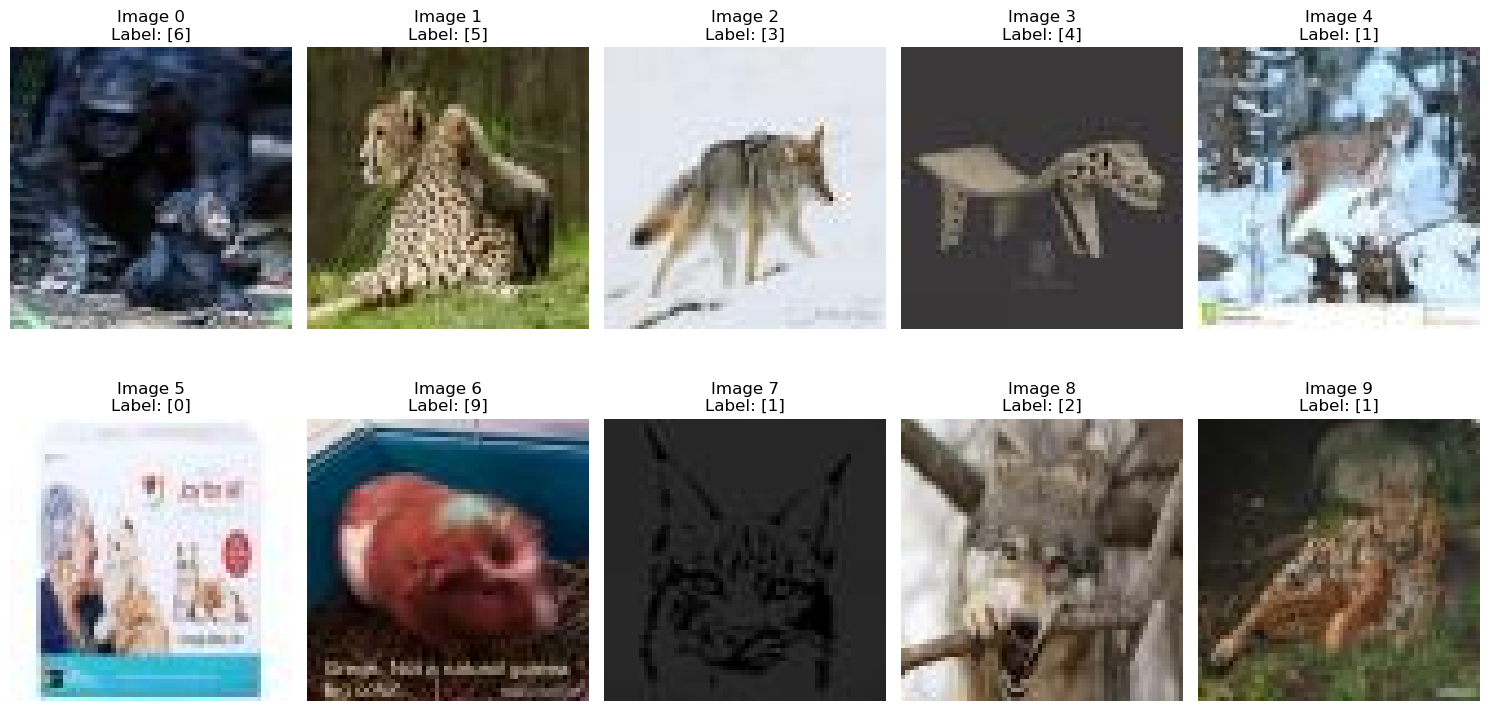

In [25]:
plt.figure(figsize=(15, 8))
#to print with labels
for i in range(10):
    sample = ds_train[i]
    img = sample['images'].numpy()
    label = sample['labels'].numpy()  # extract label
    
    plt.subplot(2, 5, i+1)
    plt.imshow(img)
    plt.title(f"Image {i}\nLabel: {label}")
    plt.axis("off")

plt.tight_layout()
plt.show()
